In [1]:
from builtins import range, input
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical


IMAGE_SIZE = [224, 224]  


tumor_path = r'C:\Users\ADMIN\OneDrive\Desktop\4-1\Major Project\image\image\Tumor'
nontumor_path = r'C:\Users\ADMIN\OneDrive\Desktop\4-1\Major Project\image\image\Non-tumor'

 


tumor_files = glob(tumor_path + '/*')
nontumor_files = glob(nontumor_path + '/*')

print("First 5 Tumor Files: ",tumor_files[0:5])
print("Total Count: ",len(tumor_files))
print("First 5 NonTumor Files: ",nontumor_files[0:5])
print("Total Count: ",len(nontumor_files))






First 5 Tumor Files:  ['C:\\Users\\ADMIN\\OneDrive\\Desktop\\4-1\\Major Project\\image\\image\\Tumor\\000000 (6).png', 'C:\\Users\\ADMIN\\OneDrive\\Desktop\\4-1\\Major Project\\image\\image\\Tumor\\000002 (4).png', 'C:\\Users\\ADMIN\\OneDrive\\Desktop\\4-1\\Major Project\\image\\image\\Tumor\\000002 (6).png', 'C:\\Users\\ADMIN\\OneDrive\\Desktop\\4-1\\Major Project\\image\\image\\Tumor\\000002.png', 'C:\\Users\\ADMIN\\OneDrive\\Desktop\\4-1\\Major Project\\image\\image\\Tumor\\000003 (3).png']
Total Count:  418
First 5 NonTumor Files:  ['C:\\Users\\ADMIN\\OneDrive\\Desktop\\4-1\\Major Project\\image\\image\\Non-tumor\\10 (2) - Copy.png', 'C:\\Users\\ADMIN\\OneDrive\\Desktop\\4-1\\Major Project\\image\\image\\Non-tumor\\10 (2).png', 'C:\\Users\\ADMIN\\OneDrive\\Desktop\\4-1\\Major Project\\image\\image\\Non-tumor\\10 - Copy (2) - Copy.png', 'C:\\Users\\ADMIN\\OneDrive\\Desktop\\4-1\\Major Project\\image\\image\\Non-tumor\\10 - Copy (2).png', 'C:\\Users\\ADMIN\\OneDrive\\Desktop\\4-1\\M

In [2]:
tumor_labels = []
nontumor_labels = []
tumor_images=[]
nontumor_images=[]

for i in range(len(tumor_files)):
    image = cv2.imread(tumor_files[i]) 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image = cv2.resize(image,(224,224)) 
    tumor_images.append(image) 
    tumor_labels.append('CT_TUMOR')
    
for i in range(len(nontumor_files)):
    image = cv2.imread(nontumor_files[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(224,224))
    nontumor_images.append(image)
    nontumor_labels.append('CT_NonTUMOR')



In [3]:
tumor_images[2].shape

(224, 224, 3)

In [4]:
print(tumor_images[2])

[[[0 0 0]
  [1 1 1]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [1 1 1]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [5]:
print(nontumor_images[2])

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [6]:
cv2.imwrite("img.jpg",tumor_images[2])

True

In [7]:
tumor_images = np.array(tumor_images) / 255
nontumor_images = np.array(nontumor_images) / 255

In [8]:
tumor_x_train, tumor_x_test, tumor_y_train, tumor_y_test = train_test_split(
tumor_images, tumor_labels, test_size=0.4)
nontumor_x_train, nontumor_x_test, nontumor_y_train, nontumor_y_test = train_test_split(
nontumor_images, nontumor_labels, test_size=0.4)

In [9]:
X_train = np.concatenate((nontumor_x_train, tumor_x_train), axis=0)
X_test = np.concatenate((nontumor_x_test, tumor_x_test), axis=0)
y_train = np.concatenate((nontumor_y_train, tumor_y_train), axis=0)
y_test = np.concatenate((nontumor_y_test, tumor_y_test), axis=0)


In [10]:
y_train = LabelBinarizer().fit_transform(y_train)
y_train = to_categorical(y_train)
y_test = LabelBinarizer().fit_transform(y_test)
y_test = to_categorical(y_test)



In [11]:
print(X_train.shape)
print(X_test.shape) 

(338, 224, 224, 3)
(228, 224, 224, 3)


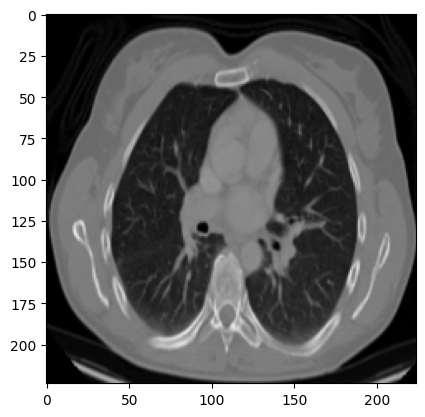

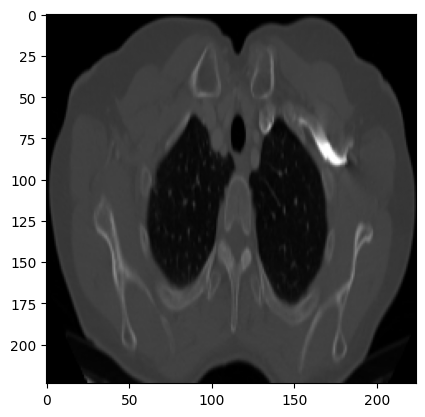

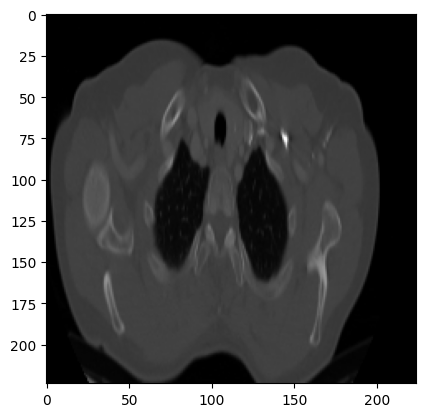

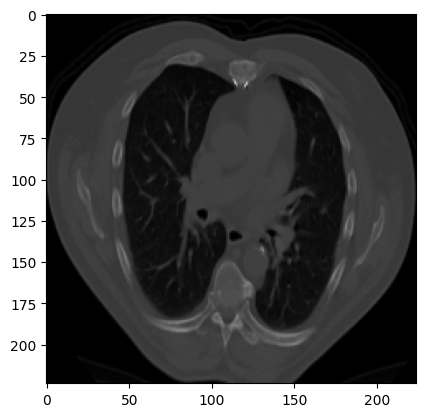

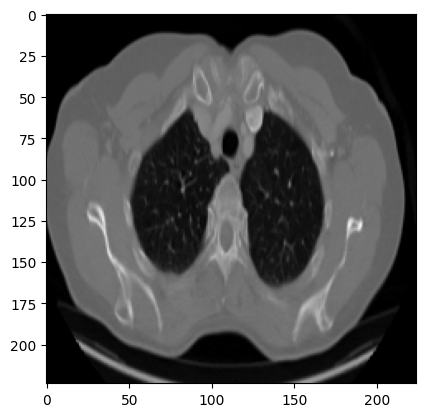

In [12]:
for i in range(0,5):
    image1=tumor_x_train[i]
    #image2=tumor_x_test[i]
    plt.imshow(image1)
    #plt.imshow(image2)
    plt.show()

In [13]:
resnet = ResNet50(weights="imagenet", include_top=False,
input_tensor=Input(shape=(224, 224, 3)))

outputs = resnet.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(2, activation="softmax")(outputs)
model = Model(inputs=resnet.input, outputs=outputs)
for layer in resnet.layers:
    layer.trainable = False
model.compile(
loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy']
)

In [14]:
epochs = 30
batch_size = 32

model.summary()
train_aug = ImageDataGenerator(
rotation_range=20,
width_shift_range=0.2,
height_shift_range=0.2,
horizontal_flip=True
)
history = model.fit(train_aug.flow(X_train, y_train, batch_size=batch_size),
validation_data=(X_test, y_test),
validation_steps=len(X_test) / batch_size,
steps_per_epoch=len(X_train) / batch_size,
epochs=epochs)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [15]:
model.save('resnet_ct.keras')
model.save_weights('resnet_weights_ct.hdf5')




8/8 [==============================] - 16s 2s/step


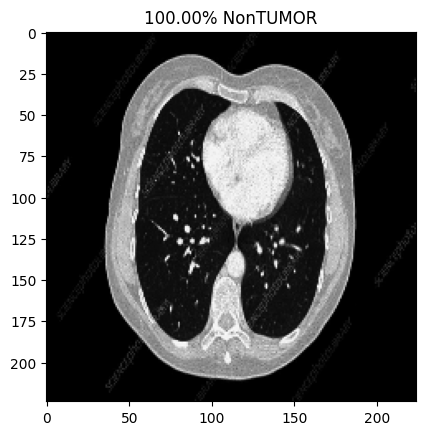

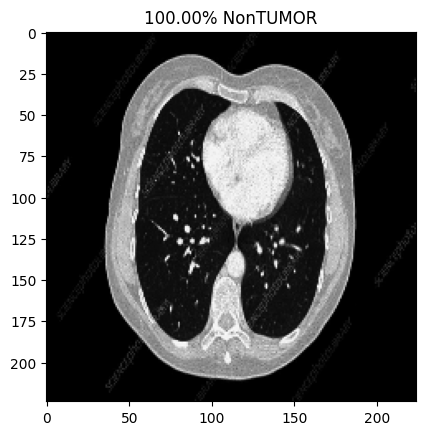

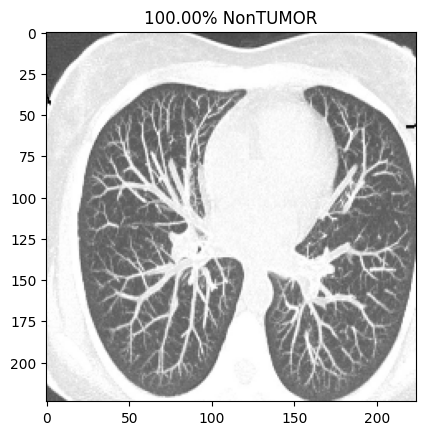

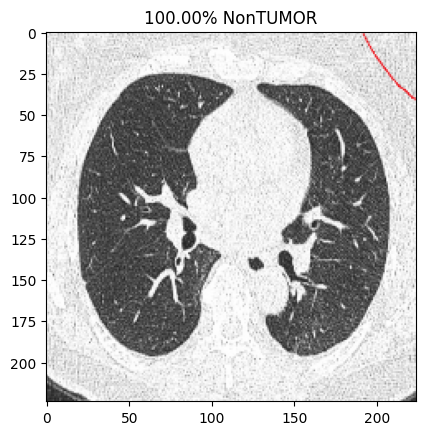

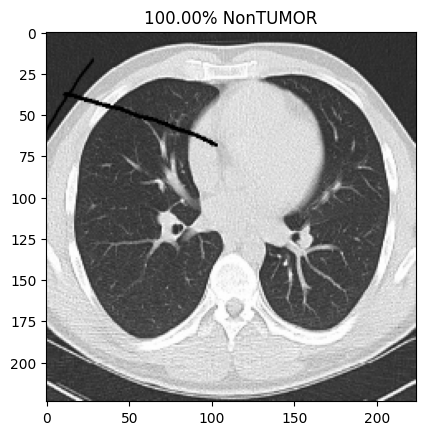

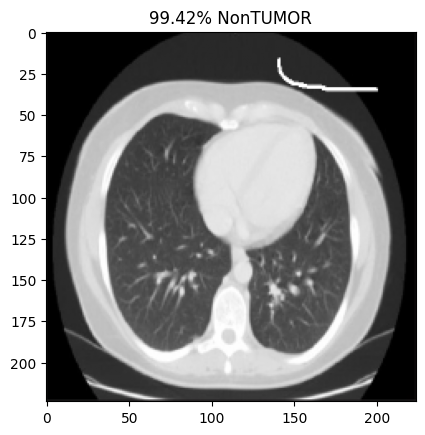

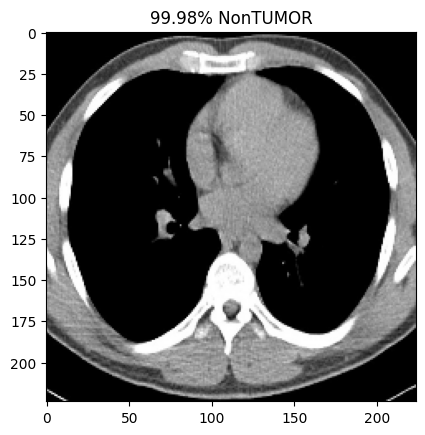

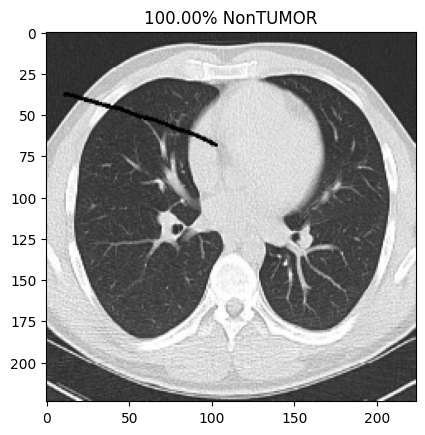

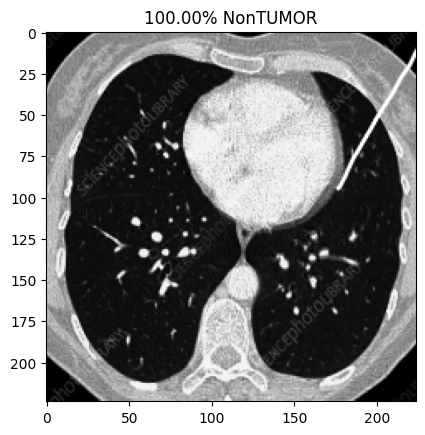

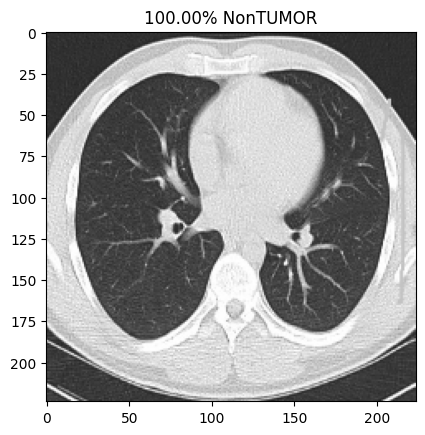

In [16]:
model = load_model('resnet_ct.keras')
y_pred = model.predict(X_test, batch_size=batch_size)
prediction=y_pred[0:10]
for index, probability in enumerate(prediction):
    if probability[1] > 0.5:
        plt.title('%.2f' % (probability[1]*100) + '% TUMOR')
    else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% NonTUMOR')
    plt.imshow(X_test[index])
    plt.show()


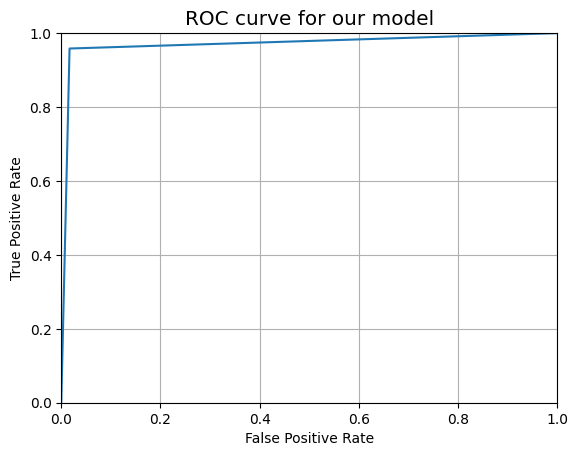

In [17]:
from sklearn.metrics import roc_curve


y_pred_bin = np.argmax(y_pred, axis=1)
y_test_bin = np.argmax(y_test, axis=1)
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for our model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)



Confusion Matrix without Normalization


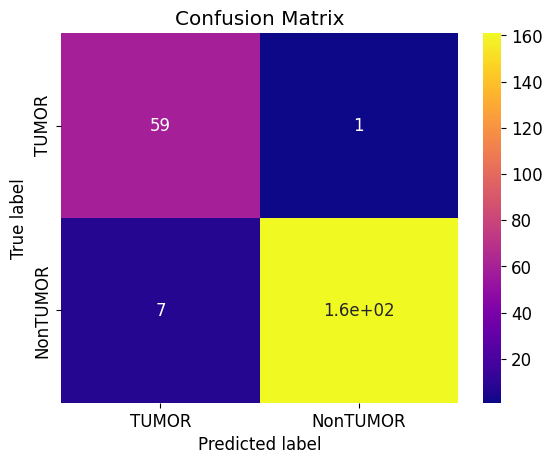

Confusion Matrix with Normalized Values


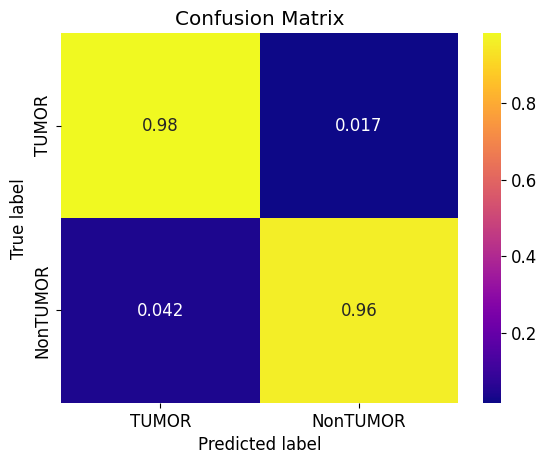

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(normalize):
    classes = ['TUMOR','NonTUMOR']
    tick_marks = [0.5,1.5]
    cn = confusion_matrix(y_test_bin, y_pred_bin,normalize=normalize)
    sns.heatmap(cn,cmap='plasma',annot=True)
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)
print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

              precision    recall  f1-score   support

           0       0.89      0.98      0.94        60
           1       0.99      0.96      0.98       168

    accuracy                           0.96       228
   macro avg       0.94      0.97      0.96       228
weighted avg       0.97      0.96      0.97       228



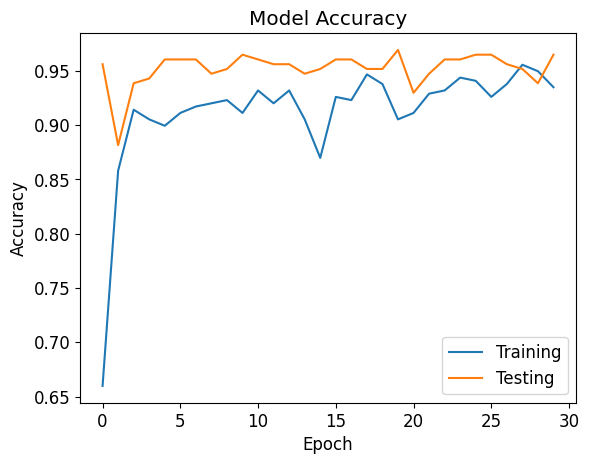

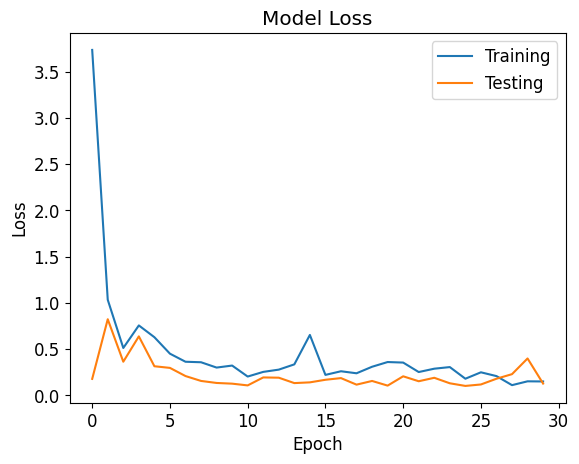

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test_bin,y_pred_bin))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'])
plt.savefig('resnet_ct_accuracy.png')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'])
plt.savefig('resnet_ct_loss.png')
plt.show()

